In [123]:
import numpy as np
import scipy as sp 
from matplotlib import pyplot as plt

In [130]:
# define relevant constants
n = 1000
sigma_2 = 0.5
sigma = np.sqrt(sigma_2)
m = 30
k = 10

In [114]:
# generate sample data 
noise = np.random.normal(0,sigma,n)
x = np.random.uniform(-1,1,size=n)
y = np.sin(2*np.pi*x) + noise

In [115]:
#helpful functions!
def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X
def designvector(x_input,m):
    dvector = np.vstack([1]).T
    for i in range(m):
        dvector = np.vstack([dvector.T, x_input**(i+1)]).T
    return dvector

In [ ]:
avg_bias_2, avg_variance, avg_testMSE, avg_trainMSE  = np.zeros(m),  np.zeros(m),  np.zeros(m), np.zeros(m)

for p in range(m):
    testMSE = np.zeros(k)
    trainMSE = np.zeros(k)
    
    X = designmatrix(x, p+1)
    
    #iterate over the k-fold set
    for i in range(k):
        
        #split data
        x_train = np.concatenate((x[0:100*i], x[100*(i+1):1000]))
        y_train = np.concatenate((y[0:100*i], y[100*(i+1):1000]))
        x_test = x[100*i:100*(i+1)]
        y_test = x[100*i:100*(i+1)]
        
        #design matrices
        X_train = designmatrix(x_train, p+1)
        X_test = designmatrix(x_test, p+1)
        
        #compute coefficients
        w = np.linalg.lstsq(X_train,y_train, rcond=None)[0]
        
        #store coefficients
        if (i == 0):
            mw = w
        else:
            mw = np.vstack([mw.T, w]).T
        
        #compute MSE
        testMSE[i] = (1 / len(x_test)) * sum((y_test - X_test @ w)**2)
        trainMSE[i] = (1 / len(x_train)) * sum((y_train - X_train @ w)**2)
    
    #compute bias using formula
    average_model = np.average(mw,axis=1)
    avg_bias_2[p] = (1 / len(x)) * sum((X @ average_model - np.sin(2*np.pi*x))**2)
    
    #iterate over all x_i
    variance = 0
    for x_value in x:
        #iterate over all models y
        inner = 0
        for model_index in range(k): 
            inner = inner + (designvector(x_value, p+1) @ mw[:,model_index] - designvector(x_value, p+1) @ average_model)**2
        variance = variance + inner / k
    avg_variance[p] = variance / n
    
    avg_testMSE[p] = np.average(testMSE)
    
    avg_trainMSE[p] = np.average(trainMSE)


/var/folders/6_/478gy13932n5hyzwyl7crpwm0000gn/T/ipykernel_32276/1313825130.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  avg_variance[p] = variance / n


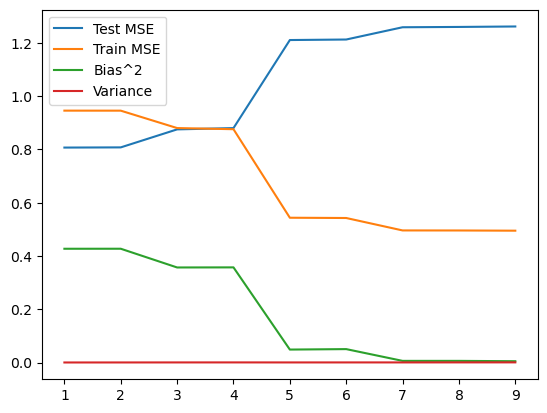

In [129]:
x_axis = list(range(1,m+1))

plt.plot(x_axis, avg_testMSE, label='Test MSE')
plt.plot(x_axis, avg_trainMSE, label='Train MSE')
plt.plot(x_axis, avg_bias_2, label='Bias^2')
plt.plot(x_axis, avg_variance, label='Variance')
#plt.plot(list(range(m)), avg_bias_2 + avg_variance, label='Bias-Variance')

plt.legend()

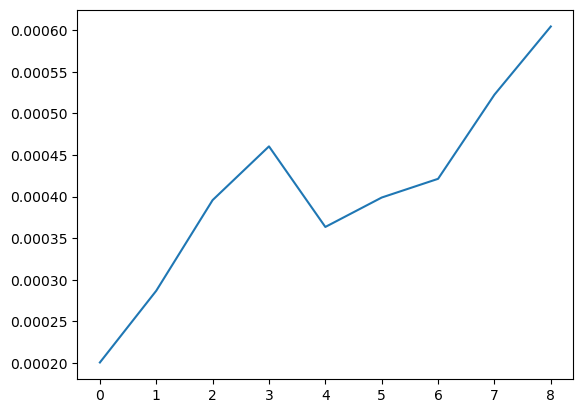

In [118]:
plt.plot(list(range(m)), avg_variance, label='Variance')

In [108]:
x[250]

-0.1945658988517729

In [109]:
y[250]

-0.806473084582942

array([1.75240355, 1.75301395, 1.75525671, 1.75586494, 1.75403468,
       1.75499459, 1.75438184, 1.75539511, 1.75633485])